<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/FeatureTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Loan Approval Prediction System**

Use feature transformation to compare accuracy. Feature Transformation includes many steps that helps to create new features based on the existing features. It is simply a function that transforms features from one representation to another. We have followed a few ways mentioned below to achieve this.

* Transforming categorical features to numerical.
* Scaling or normalizing features within a range, say between 0 to 1.
* Data Imputation
* SVM also transforms features internally.



*References*:

https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80

https://scikit-learn.org/stable/data_transforms.html

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

*Data Source*:

Loan Prediction Problem Dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Lending Club Dataset: https://www.kaggle.com/wordsforthewise/lending-club

Features Analysis Excel: https://sjsu0-my.sharepoint.com/:x:/g/personal/juhi_nayak_sjsu_edu/EXjGpC6keKRPkbOKv_nb5kcBo_NcIAqFsReNJq-B5N5yPA?e=lUnXU3

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import warnings

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls ./drive/My\ Drive/datasets/loan-prediction

Mounted at /content/drive
BankLoanApprovalFinalDataset.csv       SPSS_loan_roc.sav
lending-club			       test_Y3wMUE5_7gLdaTN.csv
LoanPredictionProblemDescription.xlsx  train_u6lujuX_CVtuZ9i.csv


# Lending Club Dataset

## Load Dataset

In [ ]:
# Take the latest data for year 2018

data = pd.read_csv(
    '/content/drive/My Drive/datasets/loan-prediction/lending-club/accepted_2007_to_2018Q4.csv.gz',
    parse_dates=['issue_d'], infer_datetime_format=True,low_memory=False)
data = data[(data.issue_d >= '2018-01-01 00:00:00') & (data.issue_d < '2019-01-01 00:00:00')]
data = data.reset_index(drop=True)

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,130954621,NaN,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,8 years,RENT,50000.0,Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130954621,NaN,other,Other,740xx,OK,21.80,1.0,Jan-2009,665.0,669.0,0.0,9.0,NaN,5.0,0.0,116.0,23.2,18.0,w,3780.31,3780.31,...,33430.0,19344.0,500.0,27820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,130964697,NaN,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,2 years,OWN,196000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130964697,NaN,debt_consolidation,Debt consolidation,337xx,FL,18.29,0.0,Jul-1998,700.0,704.0,0.0,65.0,NaN,19.0,0.0,24243.0,46.3,53.0,w,10878.50,10878.50,...,605228.0,137713.0,28500.0,147178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,130955326,NaN,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,< 1 year,RENT,44000.0,Not Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130955326,NaN,medical,Medical expenses,030xx,NH,43.97,1.0,Jul-2007,665.0,669.0,2.0,6.0,NaN,8.0,0.0,1526.0,24.6,14.0,w,10193.73,10193.73,...,80367.0,67173.0,1900.0,74167.0,7101.0,610.0,614.0,Feb-2005,3.0,1.0,14.0,80.0,11.0,8.0,0.0,2.0,37.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,130504052,NaN,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,10+ years,MORTGAGE,65000.0,Source Verified,2018-03-01,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130504052,NaN,debt_consolidation,Debt consolidation,361xx,AL,12.89,1.0,Mar-1995,665.0,669.0,1.0,22.0,NaN,7.0,0.0,8657.0,98.4,16.0,w,22188.73,22188.73,...,101234.0,17039.0,3300.0,10220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,130956066,NaN,3000.0,3000.0,3000.0,36 months,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,Source Verified,2018-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=130956066,NaN,major_purchase,Major purchase,988xx,WA,0.58,0.0,Jan-1998,760.0,764.0,0.0,26.0,NaN,7.0,0.0,141.0,0.5,30.0,w,0.00,0.00,...,191216.0,141.0,30500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Choose required columns. Create a new dataframe with only required number of columns
df_LendingClub = data[['purpose','annual_inc','loan_amnt','term','loan_status','home_ownership','emp_length','dti']]
df_LendingClub.head(5)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,emp_length,dti
0,other,50000.0,5000.0,36 months,Current,RENT,8 years,21.80
1,debt_consolidation,196000.0,15000.0,36 months,Current,OWN,2 years,18.29
2,medical,44000.0,11200.0,60 months,Current,RENT,< 1 year,43.97
3,debt_consolidation,65000.0,25000.0,60 months,Current,MORTGAGE,10+ years,12.89
4,major_purchase,52000.0,3000.0,36 months,Fully Paid,RENT,9 years,0.58


In [ ]:
data_dict=pd.read_excel('/content/drive/My Drive/datasets/loan-prediction/lending-club/LCDataDictionary.xlsx',sheet_name='LoanStats')

In [ ]:
data_dtypes=pd.DataFrame(df_LendingClub.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['LoanStatNew', 'dtype']
data_dtypes['first value'] = df_LendingClub.loc[0].values

In [ ]:
data_col=data_dtypes.merge(data_dict, on='LoanStatNew',how='left')

In [ ]:
data_col.head(10)

,LoanStatNew,dtype,first value,Description
0,purpose,object,other,A category provided by the borrower for the loan request.
1,annual_inc,float64,50000,The annual income provided by the borrower during registration.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,loan_status,object,Current,Current status of the loan
5,home_ownership,object,RENT,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
6,emp_length,object,8 years,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
7,dti,float64,21.8,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."


## Data Cleaning

In [ ]:
df_LendingClub.isnull().sum()

purpose           0    
annual_inc        0    
loan_amnt         0    
term              0    
loan_status       0    
home_ownership    0    
emp_length        41987
dti               1132 
dtype: int64

In [ ]:
df_LendingClub.dropna(subset=['emp_length','dti'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(df_LendingClub.loan_status.value_counts())

# Remove the 'Current' loan status values
df_LendingClub = df_LendingClub[df_LendingClub.loan_status != 'Current']
print(df_LendingClub.loan_status.value_counts())

Current               391262
Fully Paid            43691 
Charged Off           7683  
Late (31-120 days)    6477  
In Grace Period       2656  
Late (16-30 days)     1400  
Default               7     
Name: loan_status, dtype: int64
Fully Paid            43691
Charged Off           7683 
Late (31-120 days)    6477 
In Grace Period       2656 
Late (16-30 days)     1400 
Default               7    
Name: loan_status, dtype: int64


Considering 'Fully Paid' as Loan_status = approved and for rest other categories Loan_status = not approved




In [ ]:
default=['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default']
df_LendingClub['loan_status']=df_LendingClub['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [ ]:
df_LendingClub['loan_status'] = df_LendingClub['loan_status'].replace({'Fully Paid':1,'Default':0})

In [ ]:
df_LendingClub.loan_status.value_counts()

1    43691
0    18223
Name: loan_status, dtype: int64

In [ ]:
# Remove string characters in 'term' column and convert to numeric
df_LendingClub['term'] = df_LendingClub['term'].str.replace(r'\D', '')
df_LendingClub['term'] = df_LendingClub['term'].astype(int)

Adding a new column 'Employed' to check whether the applicant is employed or not. We have calculated this based on emp_length.

Considering < 1 year of employee length as non-employed and > 1 years as employee

In [ ]:
def employee_emp_length(x):
    if x=='< 1 year':
        return 0
    else:
        return 1
    
df_LendingClub['Employed']=df_LendingClub['emp_length'].apply(employee_emp_length)

In [ ]:
# drop emp_length column
df_LendingClub.drop(['emp_length'],axis=1,inplace=True)

In [ ]:
# Convert all non-numeric values to numeric
categorial_featues = ['purpose','home_ownership']

for var in categorial_featues:
    le = preprocessing.LabelEncoder()
    le.fit(df_LendingClub[var])
    print(list(le.classes_)) # shows unique values
    print(le.transform(df_LendingClub[var])) # assigns a numeric value
    df_LendingClub[var]=le.fit_transform(df_LendingClub[var].astype('str'))
    # print(list(le.inverse_transform([0, 1, 2, 3]))) # returns the corresponding colun value for that numeric value

['car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']
[5 8 3 ... 1 2 8]
['ANY', 'MORTGAGE', 'OWN', 'RENT']
[3 2 1 ... 3 1 3]


In [ ]:
df_LendingClub.head(15)

,purpose,annual_inc,loan_amnt,term,loan_status,home_ownership,dti,Employed
4,5,52000.0,3000.0,36,1,3,0.58,1
16,8,55000.0,5000.0,36,1,2,14.18,1
23,3,40000.0,7000.0,36,1,1,20.25,0
24,1,55000.0,20300.0,60,0,3,26.63,0
38,2,57000.0,30000.0,36,1,2,27.58,1
40,4,85000.0,21000.0,60,1,2,15.76,1
42,2,150000.0,40000.0,60,1,1,4.09,1
50,1,36610.0,5000.0,36,1,3,13.85,1
68,3,86000.0,15000.0,36,1,1,9.66,1
71,2,38000.0,12000.0,36,1,3,21.45,1


In [ ]:
df_LendingClub.rename(columns={ 'purpose':'Purpose','annual_inc':'Annual_Income','loan_amnt':'Loan_Amount',
                               'term': 'Loan_Amount_Term','loan_status':'Loan_Status','home_ownership':'Home_Ownership'}, inplace=True)

# Loan prediction Dataset

## Load Dataset

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/train_u6lujuX_CVtuZ9i.csv"
df_Loan = pd.read_csv(path)
df_Loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Drop unneccesory columns
df_Loan.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [ ]:
data_dict=pd.read_excel('/content/drive/My Drive/datasets/loan-prediction/LoanPredictionProblemDescription.xlsx')

In [ ]:
data_dtypes=pd.DataFrame(df_Loan.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['Variable', 'dtype']
data_dtypes['first value'] = df_Loan.loc[0].values

In [ ]:
data_col=data_dtypes.merge(data_dict, on='Variable',how='left')

In [ ]:
data_col.head(10)

,Variable,dtype,first value,Description
0,ApplicantIncome,int64,5849,Applicant income
1,CoapplicantIncome,float64,0,Coapplicant income
2,LoanAmount,float64,NaN,Loan amount in thousands
3,Loan_Amount_Term,float64,360,Term of loan in months
4,Credit_History,float64,1,credit history meets guidelines
5,Loan_Status,object,Y,Loan approved (Y/N)


## Data Cleaning

In [ ]:
df_Loan.isnull().sum()

ApplicantIncome      0 
CoapplicantIncome    0 
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status          0 
dtype: int64

In [ ]:
df_Loan['LoanAmount'] = df_Loan['LoanAmount'].fillna(df_Loan['LoanAmount'].mean())

In [ ]:
df_Loan['Loan_Amount_Term'] = df_Loan['Loan_Amount_Term'].fillna(df_Loan['Loan_Amount_Term'].mean())

In [ ]:
df_Loan['Credit_History'] = df_Loan['Credit_History'].fillna(0)

In [ ]:
df_Loan["Annual_Income"] = df_Loan["ApplicantIncome"] + df_Loan["CoapplicantIncome"]
df_Loan.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [ ]:
# Add a new column "Employed" as 1. Self_Employed column indicates whether the applicant is self-employed or not but we assume evey applicant is employed. 
df_Loan["Employed"] = 1

In [ ]:
# Add a new column to have the purpose converting house as '4' becuase Lending club has value as 4 for house
df_Loan['Purpose'] = 4

In [ ]:
# Add a new column for home_ownership as mortgage as '1' becuase Lending club has value as 1 for MORTGAGE
df_Loan["Home_Ownership"] = 1

In [ ]:
df_Loan['Loan_Status'] = df_Loan['Loan_Status'].replace({'Y':1,'N':0})

In [ ]:
df_Loan.head(10)

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership
0,146.412162,360.0,1.0,1,5849.0,1,4,1
1,128.000000,360.0,1.0,0,6091.0,1,4,1
2,66.000000,360.0,1.0,1,3000.0,1,4,1
3,120.000000,360.0,1.0,1,4941.0,1,4,1
4,141.000000,360.0,1.0,1,6000.0,1,4,1
5,267.000000,360.0,1.0,1,9613.0,1,4,1
6,95.000000,360.0,1.0,1,3849.0,1,4,1
7,158.000000,360.0,0.0,0,5540.0,1,4,1
8,168.000000,360.0,1.0,1,5532.0,1,4,1
9,349.000000,360.0,1.0,0,23809.0,1,4,1


In [ ]:
df_Loan.rename(columns={ 'LoanAmount': 'Loan_Amount'}, inplace=True)

# Data Imputation

## Credit History

Applying Logistic Regression to predict the Credit History data from Loan Prediction Problem dataset and create a new fetaure in Lending Club dataset.

### Loan Prediction Problem Dataset

In [ ]:
X = df_Loan[['Loan_Amount', 'Annual_Income', 'Loan_Status']]
print(X.columns)
y = df_Loan['Credit_History'].values

Index(['Loan_Amount', 'Annual_Income', 'Loan_Status'], dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
classifier = MLPClassifier(random_state=1, max_iter=300)
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1 24]
 [ 1 97]]
              precision    recall  f1-score   support

         0.0       0.50      0.04      0.07        25
         1.0       0.80      0.99      0.89        98

    accuracy                           0.80       123
   macro avg       0.65      0.51      0.48       123
weighted avg       0.74      0.80      0.72       123



### Lending Club Dataset

In [ ]:
X_new = df_LendingClub[['Loan_Amount', 'Annual_Income', 'Loan_Status']]
print(X.columns)

Index(['Loan_Amount', 'Annual_Income', 'Loan_Status'], dtype='object')


In [ ]:
CreditHistory_pred = classifier.predict(X_new)

In [ ]:
df_LendingClub['Credit_History'] = CreditHistory_pred

In [ ]:
df_LendingClub.Credit_History.value_counts()

0.0    58849
1.0    3065 
Name: Credit_History, dtype: int64

## dti

Applying Linear Regression to predict the dti (debt income ratio) data from Lending Club dataset and create a new fetaure in Loan Prediction Problem dataset.

### Lending Club Dataset

Performing Linear Regression to predict the Debt-to-Income Ratio based on Applicant Income, Loan Amount, and Loan Term

In [ ]:
X = df_LendingClub[['Annual_Income', 'Loan_Amount', 'Loan_Amount_Term']]

In [ ]:
y = df_LendingClub['dti']

In [ ]:
# Replace values over 200 with 200
df_LendingClub.loc[df_LendingClub['dti'] > 200, 'dti'] = 200

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,test_size=0.30)

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

### Loan Predcition Problem Dataset

Apply Linear Regression Model to Loan Data Set to Predict DTI

In [ ]:
X = df_Loan[['Annual_Income', 'Loan_Amount', 'Loan_Amount_Term']]

In [ ]:
predicted_y = regr.predict(X)

In [ ]:
df_Loan['dti'] = predicted_y

In [ ]:
df_Loan['dti'].describe()

count    614.000000
mean     29.826567 
std      2.357156  
min      17.816175 
25%      30.403907 
50%      30.511301 
75%      30.547085 
max      34.958430 
Name: dti, dtype: float64

# Combine Datasets

In [ ]:
# Create a new final dataframe combining both the dataframes
final_df = pd.concat([df_Loan,df_LendingClub], axis=0, ignore_index=True)

In [ ]:
final_df.head(10)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership,dti
0,146.412162,360.0,1.0,1,5849.0,1,4,1,30.510709
1,128.000000,360.0,1.0,0,6091.0,1,4,1,30.503228
2,66.000000,360.0,1.0,1,3000.0,1,4,1,30.577049
3,120.000000,360.0,1.0,1,4941.0,1,4,1,30.531795
4,141.000000,360.0,1.0,1,6000.0,1,4,1,30.506485
5,267.000000,360.0,1.0,1,9613.0,1,4,1,30.424111
6,95.000000,360.0,1.0,1,3849.0,1,4,1,30.557648
7,158.000000,360.0,0.0,0,5540.0,1,4,1,30.519388
8,168.000000,360.0,1.0,1,5532.0,1,4,1,30.520322
9,349.000000,360.0,1.0,0,23809.0,1,4,1,30.070256


In [ ]:
final_df.tail(10)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership,dti
62518,6000.0,36.0,0.0,1,68000.0,1,1,1,20.88
62519,30000.0,36.0,0.0,1,64577.0,1,1,1,20.29
62520,25000.0,60.0,0.0,1,110000.0,1,2,1,21.05
62521,6500.0,36.0,0.0,1,26000.0,1,2,3,14.68
62522,14400.0,60.0,0.0,0,45000.0,1,8,3,7.55
62523,35000.0,36.0,0.0,1,100000.0,1,8,1,11.95
62524,12300.0,36.0,0.0,1,112000.0,1,2,1,4.31
62525,9000.0,36.0,0.0,0,85000.0,1,1,3,23.45
62526,5000.0,36.0,0.0,1,32000.0,1,2,1,24.12
62527,3000.0,36.0,0.0,0,72000.0,1,8,3,5.87


## Export final dataset into a csv file

Run the below cell to download the final dataset as a csv file. The file will be downloaded into your loacl machine. Please note it will also add the first column with the serial numbers so we can delete that column and use this csv file as our final dataset to perform further algorithms.

In [ ]:
# Downloads the file in local machine
# from google.colab import files
# final_df.to_csv('BankLoanApprovalFinalDataset.csv')
# files.download('BankLoanApprovalFinalDataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Run the below cells to export the dataframe as a google sheet. After execution of these cells, please check your drive for the file.

In [ ]:
# Export to Google Sheet

# !pip install --upgrade --quiet gspread
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from oauth2client.client import GoogleCredentials

# gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# from gspread_dataframe import get_as_dataframe, set_with_dataframe

# sh = gc.create('BankLoanApprovalFinalDataset')
# worksheet = gc.open('BankLoanApprovalFinalDataset').sheet1

# set_with_dataframe(worksheet,final_df)

# Import Final Dataset

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/BankLoanApprovalFinalDataset.csv"
df = pd.read_csv(path)
df.head(5)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership,dti
0,146.412162,360,1,1,5849.0,1,4,1,30.510709
1,128.000000,360,1,0,6091.0,1,4,1,30.503228
2,66.000000,360,1,1,3000.0,1,4,1,30.577049
3,120.000000,360,1,1,4941.0,1,4,1,30.531795
4,141.000000,360,1,1,6000.0,1,4,1,30.506485


# Data Visualization

Categorise the variable type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e59eec208>,
      dtype=object)

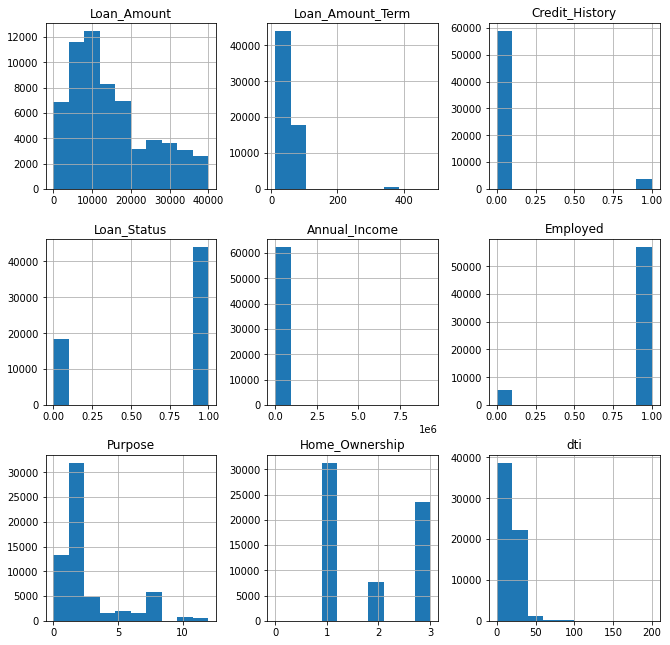

In [ ]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

The above histograms of all the numerical features helps to categorise the variable types in the dataset. The *continuous* (infinite values) features display a continuous distribution pattern, whilst the *dichotomous* (2 possible values usually 0 and 1) features have only two bars.The *nominal* (2 or more possible values with no meaningful order or rank) and *ordinal* (2 or more possible values with a meaningful order or rank) variables can sometimes be trickier to determine, and may require some further knowledge of the dataset or some specific domain knowledge 

# Feature Scaling

The continuous variables in our dataset are at varying scales. For instance, refering to the histograms above we can see that the variable “Loan_Amount” ranges from 0 to 40000, whilst “Annual_Income” ranges from 0 to 7.5. This may cause a problem to make the final predictions. Standardising the scale for all continuous variables can often result in an increase in performance of machine learning models.
We have used Sci-Kit Learn MinMaxScaler function. Which transforms the scale so that all values in the features range from 0 to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
n_test = df[['Loan_Amount','Annual_Income']]
cols_to_norm = ['Loan_Amount','Annual_Income']
x = n_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
n_test = pd.DataFrame(x_scaled, columns=cols_to_norm)
l_test = df.drop(['Loan_Amount','Annual_Income'], axis=1)
df = pd.concat([n_test, l_test], axis=1)
df.columns

Index(['Loan_Amount', 'Annual_Income', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Employed', 'Purpose', 'Home_Ownership', 'dti'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e595caeb8>,
      dtype=object)

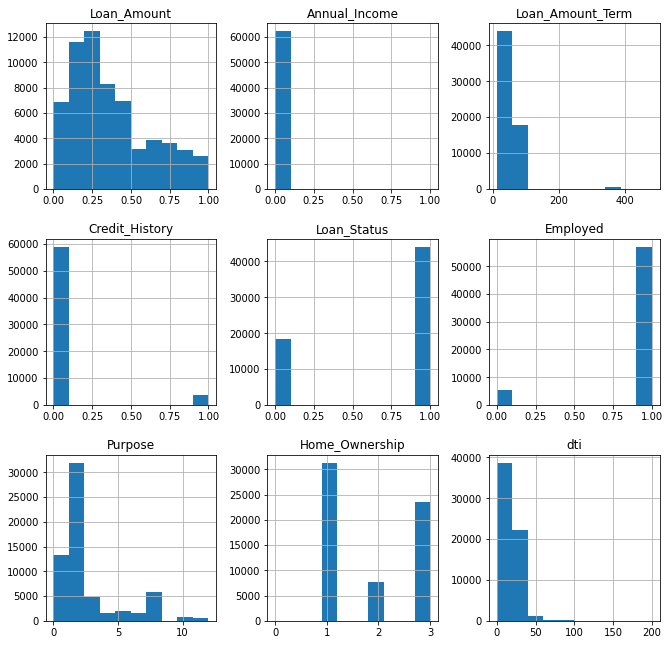

In [ ]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [ ]:
df.head(5)

,Loan_Amount,Annual_Income,Loan_Amount_Term,Credit_History,Loan_Status,Employed,Purpose,Home_Ownership,dti
0,0.003436,0.000625,360,1,1,1,4,1,30.510709
1,0.002976,0.000652,360,1,0,1,4,1,30.503228
2,0.001425,0.000319,360,1,1,1,4,1,30.577049
3,0.002776,0.000528,360,1,1,1,4,1,30.531795
4,0.003301,0.000642,360,1,1,1,4,1,30.506485


In [ ]:
df.tail(5)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership,dti
62523,35000.0,36,0,1,100000.0,1,8,1,11.95
62524,12300.0,36,0,1,112000.0,1,2,1,4.31
62525,9000.0,36,0,0,85000.0,1,1,3,23.45
62526,5000.0,36,0,1,32000.0,1,2,1,24.12
62527,3000.0,36,0,0,72000.0,1,8,3,5.87


# Implementing Kernel

In [ ]:
X = df[['Purpose','Loan_Amount','Annual_Income','dti']]
y = df[['Loan_Status']]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0 3646]
 [   0 8860]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3646
           1       0.71      1.00      0.83      8860

    accuracy                           0.71     12506
   macro avg       0.35      0.50      0.41     12506
weighted avg       0.50      0.71      0.59     12506



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Kernel SVM

### Gaussian Kernel

In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  47 3625]
 [  30 8804]]
              precision    recall  f1-score   support

           0       0.61      0.01      0.03      3672
           1       0.71      1.00      0.83      8834

    accuracy                           0.71     12506
   macro avg       0.66      0.50      0.43     12506
weighted avg       0.68      0.71      0.59     12506



### Sigmoid Kernel

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1164 2508]
 [2567 6267]]
              precision    recall  f1-score   support

           0       0.31      0.32      0.31      3672
           1       0.71      0.71      0.71      8834

    accuracy                           0.59     12506
   macro avg       0.51      0.51      0.51     12506
weighted avg       0.60      0.59      0.60     12506



If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems